<a href="https://colab.research.google.com/github/Sythaz/PCVK_Ganjil_2024/blob/main/PCVK_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Transformasi Linear Brightness
Formula: **g(x,y)=f(x,y)+b**

***g(x,y)*** adalah nilai pixel setelah transformasi, ***f(x,y)*** adalah nilai pixel asli, ***b*** adalah nilai brightness

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


/tmp/ipython-input-345736095.py:31: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


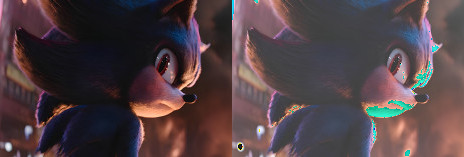

In [45]:
# Import library yang diperlukan
import cv2  # OpenCV untuk pengolahan citra
import numpy as np  # NumPy untuk operasi array/matriks
from google.colab.patches import cv2_imshow  # Untuk menampilkan gambar di Google Colab

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')

# Meminta input nilai kecerahan dari pengguna
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number' )  # Menangani error jika input bukan angka

# Membaca gambar asli dari path yang ditentukan
original = cv2.imread('/content/drive/MyDrive/PCVK/Images/sonic.jpg')

# Membuat array kosong dengan bentuk dan tipe data yang sama seperti gambar asli
# untuk menyimpan hasil penyesuaian kecerahan
brightness_image = np.zeros(original.shape, original.dtype)

# Metode 1: Mengakses dan memproses setiap piksel secara individual
# Loop melalui setiap baris (y) dalam gambar
for y in range(original.shape[0]) :
  # Loop melalui setiap kolom (x) dalam baris
  for x in range(original.shape[1]):
    # Loop melalui setiap channel warna (BGR)
    for c in range(original.shape[2]):
      # Menyesuaikan nilai kecerahan dengan menambahkan nilai brightness
      # np.clip digunakan untuk memastikan nilai tetap dalam rentang 0-255
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# Metode 2: Cara sederhana tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

# Menggabungkan gambar asli dan gambar hasil penyesuaian kecerahan secara horizontal
final_frame = cv2.hconcat((original, brightness_image))

# Menampilkan gambar hasil yang telah digabungkan
cv2_imshow(final_frame)

# **Tugas**

**Inversi**

Inversi citra atau citra negatif dilakukan dengan rumus
**g(x,y) = 255 - f(x,y)**.

Operasi ini menukar area terang menjadi gelap dan sebaliknya, sehingga struktur objek terlihat lebih jelas dalam kondisi tertentu.


 Menampilkan gambar asli dan hasil inversi 
------------------------------------------


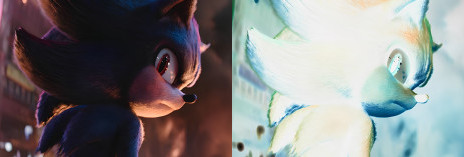

In [44]:
# Import library yang diperlukan
import cv2  # OpenCV untuk pengolahan citra
import numpy as np  # NumPy untuk operasi array/matriks
from google.colab.patches import cv2_imshow  # Untuk menampilkan gambar di Google Colab

print(' Menampilkan gambar asli dan hasil inversi ')
print('------------------------------------------')

# Membaca gambar dari path yang ditentukan
original = cv2.imread('/content/drive/MyDrive/PCVK/Images/sonic.jpg')

# Memeriksa apakah gambar berhasil dibaca
if original is None:
    print("Gambar tidak ditemukan. Pastikan path sudah benar.")
else:
    # Melakukan operasi inversi (negative) pada gambar
    # Rumus: g(x,y) = 255 - f(x,y)
    # Setiap nilai piksel dikurangkan dari 255 untuk menghasilkan efek negatif
    inverse_image = 255 - original

    # Menggabungkan gambar asli dan gambar hasil inversi secara horizontal
    # hconcat menggabungkan gambar secara side-by-side
    final_frame = cv2.hconcat([original, inverse_image])

    # Menampilkan gambar hasil yang telah digabungkan
    cv2_imshow(final_frame)

**Transformasi kontras**

Transformasi kontras mengatur seberapa tersebar nilai intensitas piksel.
Rumusnya **g(x,y) = a⋅f(x,y) + b**, di mana a adalah faktor kontras dan b faktor brightness.

Jika nilai a lebih besar, maka gambar terlihat lebih tajam (kontras tinggi).

Mengubah kontras dan tingkat kecerahan citra
----------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 60
Masukkan kontras [1.0 - 3.0]: 1.5


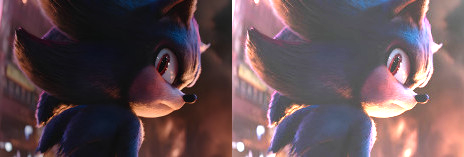

Parameter yang digunakan: Kecerahan = 60, Kontras = 1.5


In [43]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print('Mengubah kontras dan tingkat kecerahan citra')
print('----------------------------------------')

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/sonic.jpg')
if img is None:
    print("Gambar tidak ditemukan. Pastikan path sudah benar.")
else:
    # Meminta input dari pengguna
    try:
        brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
        contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))

        # Membatasi nilai input sesuai range yang ditentukan
        brightness = np.clip(brightness, -255, 255)
        contrast = np.clip(contrast, 1.0, 3.0)

        # Mengaplikasikan transformasi kecerahan dan kontras
        # Rumus: g(x,y) = α * f(x,y) + β
        # dimana α adalah kontras, β adalah kecerahan
        adjusted_img = cv2.convertScaleAbs(img, alpha=contrast, beta=brightness)

        # Menampilkan gambar asli dan hasil transformasi
        result = cv2.hconcat([img, adjusted_img])
        cv2_imshow(result)

        print(f"Parameter yang digunakan: Kecerahan = {brightness}, Kontras = {contrast}")

    except ValueError:
        print("Error: Masukkan nilai numerik yang valid")

**Transformasi logaritmik**

Transformasi logaritmik menggunakan rumus **s=c⋅log(1 + r)**.

Transformasi ini memperjelas detail pada area gelap karena nilai kecil ditingkatkan lebih signifikan dibanding nilai besar. Metode ini cocok untuk gambar dengan perbedaan intensitas yang ekstrim

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------
Masukkan nilai kecerahan: 40


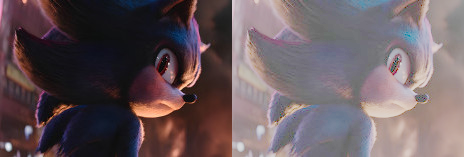

Parameter yang digunakan: c = 40.0
Rumus: s = c * log(1 + r)


In [42]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------')

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/sonic.jpg')
if img is None:
    print("Gambar tidak ditemukan. Pastikan path sudah benar.")
else:
    # Meminta input nilai kecerahan dari pengguna
    try:
        c = float(input('Masukkan nilai kecerahan: '))
    except ValueError:
        print("Error: Masukkan nilai numerik yang valid")
        c = 40  # Nilai default jika input tidak valid

    # Konversi gambar ke float32 untuk perhitungan
    img_float = img.astype(np.float32)

    # Menerapkan transformasi logaritmik
    # Rumus: s = c * log(1 + r)
    # dimana r adalah nilai piksel input, c adalah konstanta
    log_transformed = c * np.log(1 + img_float)

    # Normalisasi hasil ke range [0, 255]
    log_transformed = np.clip(log_transformed, 0, 255)
    log_transformed = log_transformed.astype(np.uint8)

    # Menampilkan gambar asli dan hasil transformasi
    result = cv2.hconcat([img, log_transformed])
    cv2_imshow(result)

    print(f"Parameter yang digunakan: c = {c}")
    print("Rumus: s = c * log(1 + r)")

**Konversi Grayscale**

Terdapat tiga metode konversi ke grayscale:
1. **Averaging**: mengambil rata-rata dari R, G, dan B.
2. **Lightness**: menggunakan rata-rata dari nilai maksimum dan minimum tiap piksel.
3. **Luminance**: menggunakan bobot berbeda (0.21R + 0.72G + 0.07B) sesuai sensitivitas mata manusia, sehingga hasilnya lebih realistis

Transformasi Grayscale dengan Berbagai Metode
---------------------------------------------

=== METODE AVERAGING ===
Rumus: gray = (R + G + B) / 3


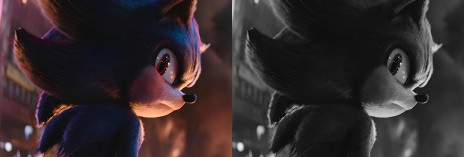


=== METODE LIGHTNESS ===
Rumus: gray = (max(R,G,B) + min(R,G,B)) / 2


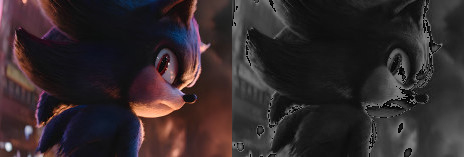


=== METODE LUMINANCE ===
Rumus: gray = 0.21*R + 0.72*G + 0.07*B


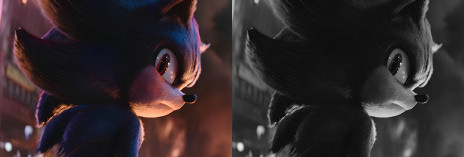

In [41]:
import cv2  # Library OpenCV untuk pengolahan citra
import numpy as np  # Library NumPy untuk manipulasi array
from google.colab.patches import cv2_imshow  # Fungsi khusus untuk menampilkan gambar di Google Colab

print('Transformasi Grayscale dengan Berbagai Metode')
print('---------------------------------------------')

# Membaca gambar berwarna dari path yang ditentukan
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/sonic.jpg')

# Mengecek apakah gambar berhasil dibaca
if img is None:
    print("Gambar tidak ditemukan. Pastikan path sudah benar.")
else:
    # ============================
    # 1. METODE AVERAGING
    # ============================
    print("\n=== METODE AVERAGING ===")
    print("Rumus: gray = (R + G + B) / 3")

    # Menghitung rata-rata dari ketiga channel warna (R, G, B)
    # axis=2 berarti menghitung rata-rata di sepanjang channel warna
    avg_gray = np.mean(img, axis=2).astype(np.uint8)

    # Mengubah citra grayscale 1-channel menjadi 3-channel (BGR)
    # agar bisa digabungkan dengan gambar asli
    avg_gray_bgr = cv2.cvtColor(avg_gray, cv2.COLOR_GRAY2BGR)

    # Menggabungkan gambar asli dan hasil grayscale secara horizontal
    result_avg = cv2.hconcat([img, avg_gray_bgr])

    # Menampilkan hasil transformasi metode averaging
    cv2_imshow(result_avg)

    # ============================
    # 2. METODE LIGHTNESS
    # ============================
    print("\n=== METODE LIGHTNESS ===")
    print("Rumus: gray = (max(R,G,B) + min(R,G,B)) / 2")

    # Mengambil nilai maksimum dan minimum dari setiap piksel
    max_val = np.max(img, axis=2)
    min_val = np.min(img, axis=2)

    # Menghitung nilai grayscale berdasarkan rumus lightness
    lightness_gray = ((max_val + min_val) / 2).astype(np.uint8)

    # Konversi ke citra BGR agar bisa digabungkan dan ditampilkan
    lightness_gray_bgr = cv2.cvtColor(lightness_gray, cv2.COLOR_GRAY2BGR)

    # Gabungkan gambar asli dan hasil lightness
    result_light = cv2.hconcat([img, lightness_gray_bgr])

    # Tampilkan hasil transformasi metode lightness
    cv2_imshow(result_light)

    # ============================
    # 3. METODE LUMINANCE
    # ============================
    print("\n=== METODE LUMINANCE ===")
    print("Rumus: gray = 0.21*R + 0.72*G + 0.07*B")

    # OpenCV menggunakan urutan channel BGR, bukan RGB
    # Jadi kita ambil channel dengan urutan: R = 2, G = 1, B = 0
    luminance_gray = (0.21 * img[:,:,2] +  # R
                      0.72 * img[:,:,1] +  # G
                      0.07 * img[:,:,0]).astype(np.uint8)  # B

    # Konversi hasil luminance ke citra BGR
    luminance_gray_bgr = cv2.cvtColor(luminance_gray, cv2.COLOR_GRAY2BGR)

    # Gabungkan gambar asli dan hasil luminance
    result_lum = cv2.hconcat([img, luminance_gray_bgr])

    # Tampilkan hasil transformasi metode luminance
    cv2_imshow(result_lum)


Menampilkan Warna Merah, Lainnya Grayscale
------------------------------------------


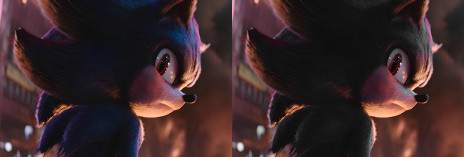

In [35]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print('Menampilkan Warna Merah, Lainnya Grayscale')
print('------------------------------------------')

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/sonic.jpg')

if img is None:
    print("Gambar tidak ditemukan. Pastikan path sudah benar.")
else:
    # Konversi BGR ke RGB untuk operasi yang lebih intuitif (opsional, tapi membantu logika)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Buat salinan gambar untuk hasil akhir
    result = np.copy(img_rgb)

    # Loop setiap piksel
    for i in range(img_rgb.shape[0]):      # Tinggi (baris)
        for j in range(img_rgb.shape[1]):  # Lebar (kolom)
            r, g, b = img_rgb[i, j]        # Ambil nilai R, G, B

            # Jika piksel TIDAK didominasi warna MERAH, ubah ke grayscale
            # Dominasi merah = nilai R lebih besar dari G dan B
            if not (r > g and r > b):
                # Konversi ke grayscale menggunakan metode Luminance
                # Sesuai modul: 0.21R + 0.72G + 0.07B
                gray_value = int(0.21 * r + 0.72 * g + 0.07 * b)
                # Set semua channel (R, G, B) ke nilai grayscale
                result[i, j] = [gray_value, gray_value, gray_value]
            # Jika didominasi merah, biarkan warna aslinya (tidak diubah)

    # Konversi kembali ke BGR untuk ditampilkan dengan cv2_imshow (jika perlu)
    # Tapi karena kita pakai cv2_imshow, sebenarnya bisa langsung tampilkan RGB
    # Atau konversi balik ke BGR agar warna merah tidak terlihat biru
    result_bgr = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)

    # Gabungkan gambar asli (BGR asli) dan hasil (BGR hasil) secara horizontal
    final_display = cv2.hconcat([img, result_bgr])

    # Tampilkan
    cv2_imshow(final_display)